### User Analytics in the Telecommunication Industry

### 1.0 Import Required packages

In [2]:
# All imports 

import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.0 Load data and Clear data

In [5]:
#load data
tel_data = pd.read_excel("Week2_challenge_data_source.xlsx")

In [6]:
#show head rows
tel_data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
#describe datas info and properties
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

In [8]:
#describe numerical data
tel_data.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [11]:
#showing how many null values ar available
tel_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Using heatmap to check for missing values 

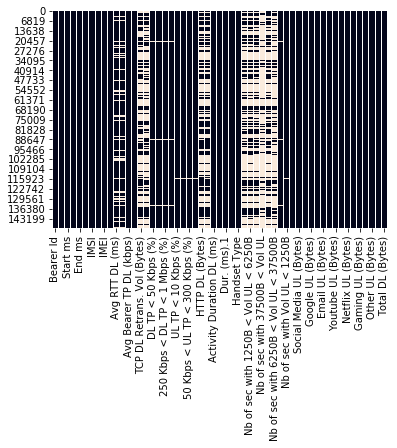

In [12]:
#using seaborn heatmap to check for missing values and where from.
sns.heatmap(tel_data.isnull(), cbar=False)

As we can see from above heat map we can identify missing values such as:-

1. Avg RTT DL (ms) has a missing value in the middle of the data
2. Avg RTT UL (ms) has a missing value
3. Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B,  Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL,  Nb of sec with 6250B < Vol DL < 31250B and  Nb of sec with 6250B < Vol UL < 37500B has most missing values

We can substitute most of null values as `NaN` can be changed to value of `0`

In [21]:
#replacing null values with apprioprate data based on the type the columns.

tel_data['Last Location Name'].fillna('Unknown',inplace=True)
tel_data['Avg RTT DL (ms)'].fillna(tel_data['Avg RTT DL (ms)'].mean(),inplace=True)
tel_data['Avg RTT UL (ms)'].fillna(tel_data['Avg RTT UL (ms)'].mean(),inplace=True)

tel_data['TCP DL Retrans. Vol (Bytes)'].fillna(tel_data['TCP DL Retrans. Vol (Bytes)'].median(),inplace=True)
tel_data['TCP UL Retrans. Vol (Bytes)'].fillna(tel_data['TCP UL Retrans. Vol (Bytes)'].median(),inplace=True)
tel_data['DL TP < 50 Kbps (%)'].fillna(tel_data['DL TP < 50 Kbps (%)'].median(),inplace=True)
tel_data['50 Kbps < DL TP < 250 Kbps (%)'].fillna(tel_data['50 Kbps < DL TP < 250 Kbps (%)'].median(),inplace=True)
tel_data['250 Kbps < DL TP < 1 Mbps (%)'].fillna(tel_data['250 Kbps < DL TP < 1 Mbps (%)'].median(),inplace=True)
tel_data['DL TP > 1 Mbps (%)'].fillna(tel_data['DL TP > 1 Mbps (%)'].median(),inplace=True)
tel_data['UL TP < 10 Kbps (%)'].fillna(tel_data['UL TP < 10 Kbps (%)'].median(),inplace=True)
tel_data['10 Kbps < UL TP < 50 Kbps (%)'].fillna(tel_data['10 Kbps < UL TP < 50 Kbps (%)'].median(),inplace=True)
tel_data['50 Kbps < UL TP < 300 Kbps (%)'].fillna(tel_data['50 Kbps < UL TP < 300 Kbps (%)'].median(),inplace=True)
tel_data['UL TP > 300 Kbps (%)'].fillna(tel_data['UL TP > 300 Kbps (%)'].median(),inplace=True)
tel_data['HTTP DL (Bytes)'].fillna(tel_data['HTTP DL (Bytes)'].median(),inplace=True)
tel_data['HTTP UL (Bytes)'].fillna(tel_data['HTTP UL (Bytes)'].median(),inplace=True)

tel_data['Handset Manufacturer'].fillna('Unknown',inplace=True)
tel_data['Handset Type'].fillna('Unknown',inplace=True)

tel_data['Nb of sec with 125000B < Vol DL'].fillna(tel_data['Nb of sec with 125000B < Vol DL'].mean(), inplace=True)
tel_data['Nb of sec with 1250B < Vol UL < 6250B'].fillna(tel_data['Nb of sec with 1250B < Vol UL < 6250B'].mean(), inplace=True)
tel_data['Nb of sec with 31250B < Vol DL < 125000B'].fillna(tel_data['Nb of sec with 31250B < Vol DL < 125000B'].mean(), inplace=True)
tel_data['Nb of sec with 37500B < Vol UL'].fillna(tel_data['Nb of sec with 37500B < Vol UL'].mean(), inplace=True)
tel_data['Nb of sec with 6250B < Vol DL < 31250B'].fillna(tel_data['Nb of sec with 6250B < Vol DL < 31250B'].mean(), inplace=True)
tel_data['Nb of sec with 6250B < Vol UL < 37500B'].fillna(tel_data['Nb of sec with 6250B < Vol UL < 37500B'].mean(), inplace=True)
tel_data['Nb of sec with Vol DL < 6250B'].fillna(tel_data['Nb of sec with Vol DL < 6250B'].mean(), inplace=True)
tel_data['Nb of sec with Vol UL < 1250B'].fillna(tel_data['Nb of sec with Vol UL < 1250B'].mean(), inplace=True)





In [22]:
tel_data.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       1
End                                            1
End ms                                         1
Dur. (ms)                                      1
IMSI                                         570
MSISDN/Number                               1066
IMEI                                         572
Last Location Name                             0
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        1
Avg Bearer TP UL (kbps)                        1
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [28]:
#droping rows which is supposed to have unique value and have null or NaN values
tel_data = tel_data.dropna()

In [29]:
tel_data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### top 10 handsets used by the customers

In [66]:
top10handsets = tel_data.groupby('Handset Type')['Handset Type'].count().nlargest(10)
top10handsets

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: Handset Type, dtype: int64

### identify the top 3 handset manufacturers

In [67]:
top3handset_manufacturer = tel_data.groupby('Handset Manufacturer')['Handset Manufacturer'].count().nlargest(3)
top3handset_manufacturer 

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

### identify the top 5 handsets per handset manufacturer

In [141]:
top5hadsetPerManufacturer = tel_data.groupby(['Handset Manufacturer','Handset Type'])[['Handset Type']].count()
top5hadsetPerManufacturer

Handset Type
Handset Manufacturer                              Handset Type                                                    
A-Link Telecom International Co Limited           A-Link Telecom I. Cubot A5                                     1
                                                  A-Link Telecom I. Cubot Note Plus                              1
                                                  A-Link Telecom I. Cubot Note S                                 1
                                                  A-Link Telecom I. Cubot Nova                                   1
                                                  A-Link Telecom I. Cubot Power                                  1
                                                  A-Link Telecom I. Cubot R9                                     1
                                                  A-Link Telecom I. Cubot X18 Plus                               2
ASUSTeK                                           Asustek Asus Zb552Kl Zenfone Go                                7
                                                  Asustek Asus Ze550Kl Zenfone2 Laser                            1
                                                  Asustek Asus Zenfone 2 Laser Ze500Kl                           3
                                                  Asustek Asus Zenfone Selfie Zd551Kl                            2
                                                  Asustek Asus Zenfone Zoom Zx551Ml                              1
                                                  Asustek Asus Zenfone2 Laser Ze600Kl                            5
                                                  Asustek Asus Zenfone2 Laser Ze601Kl                            4
Acer                                              Acer Liquid M220                                               1
                                                  Acer Liquid Z220                                               1
                                                  Acer Liquid Z530                                               1
                                                  Acer Liquid Z630                                               1
                                                  Acer Liquid Zest 4G                                            1
                                                  Acer Liquid Zest Plus                                          2
                                                  Acer M310                                                      5
                                                  Acer V370 Acer V370 Liquid E2 Duo                              1
                                                  Acer Zx Z130                                                   1
Adar                                              Adar Stanley Mobile S231                                       1
Alif Communications                               Alif Communicati. Pulian Cm84                                  1
Apple                                             Apple iPad (A1823)                                             9
                                                  Apple iPad (A1954)                                             9
                                                  Apple iPad 2 (A1396)                                           4
                                                  Apple iPad 3 (A1430)                                           2
                                                  Apple iPad 4 (A1460)                                           8
...                                                                                                            ...
Xiaomi Communications Co Ltd                      Xiaomi Communica. Xiaomi Note                                  2
Yi Sheng Technology International (Hk) Co Limited Yi Sheng Technol. Gretel A7                                    1
Yop Technology Co Limited                         Yop Technology C. Maze Alph

# Task 1

## Task 1.1

### Number of xDR sessions per user

In [ ]:
tel_data.groupby(['Bearer Id'])['Bearer Id'].count()

#### Session duration per user aggregate

In [ ]:
#Session duration for each user in milliseconds
tel_data.groupby(['Bearer Id'])['Dur. (ms)'].sum()

#### the total download (DL) and upload (UL) data  per user

In [ ]:
tel_data.groupby(['Bearer Id'])['Total DL (Bytes)','Total UL (Bytes)'].sum()

###  the total data volume (in Bytes) during this session for each application

In [55]:
newdf = tel_data.groupby('Bearer Id').agg({'Bearer Id' : ['count'],'Dur. (ms)':['sum'],'Total DL (Bytes)':['sum'],'Total UL (Bytes)':['sum']})

col_names=["number_of_xDR_sessions","session_duration","total_download(DL)","total_upload(UL)"]
newdf.columns = [col_names[i] for i,x in enumerate(newdf.columns)]
newdf['total_data_volume'] = newdf['total_download(DL)'] + newdf['total_upload(UL)']


In [56]:
newdf

,number_of_xDR_sessions,session_duration,total_download(DL),total_upload(UL),total_data_volume
Bearer Id,,,,,
6917537518543529984,1,24534.0,5.007220e+08,4.170461e+07,5.424266e+08
6917537604825860096,1,21489.0,7.095493e+08,3.869360e+07,7.482429e+08
6917537608536819712,1,27786.0,8.544659e+08,1.554893e+07,8.700148e+08
6917537633966310400,1,15635.0,8.257865e+08,4.960569e+07,8.753922e+08
6917537638622189568,1,24264.0,6.249578e+08,2.198346e+07,6.469412e+08
6917537651255709696,1,15548.0,5.721995e+08,4.728137e+07,6.194809e+08
6917537652151560192,1,20701.0,7.361892e+08,2.613630e+07,7.623255e+08
6917537652267270144,1,12604.0,8.366814e+08,5.063395e+07,8.873154e+08
6917537654333070336,1,61431.0,9.013464e+07,3.875275e+07,1.288874e+08


## Task 1.2

In [57]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148935 entries, 0 to 149999
Data columns (total 55 columns):
Bearer Id                                   148935 non-null object
Start                                       148935 non-null datetime64[ns]
Start ms                                    148935 non-null float64
End                                         148935 non-null datetime64[ns]
End ms                                      148935 non-null float64
Dur. (ms)                                   148935 non-null float64
IMSI                                        148935 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        148935 non-null float64
Last Location Name                          148935 non-null object
Avg RTT DL (ms)                             148935 non-null float64
Avg RTT UL (ms)                             148935 non-null float64
Avg Bearer TP DL (kbps)                     148935 non-null f